In [2]:
import pandas as pd
import statsmodels.api as sm
path = '/home/ge65cuw/thesis/saved/final_results/results_df.csv'

In [18]:
results_df = pd.read_csv(path, index_col=0)
results_df = results_df.dropna()
trials_list = results_df.trial_id.to_list()

In [19]:
import json
trials_df = pd.DataFrame()
for trial in trials_list:
    file_name = str(trial) + '_trial_full.json'
    file_path = '/home/ge65cuw/thesis/saved/final_results/trial_info/'
    try:
        with open(file_path+file_name) as f:
            data = json.load(f)
            params = data['params']
        trial_df = pd.DataFrame(params, index=[0])
        trial_df['trial_id'] = trial
        trials_df = pd.concat([trials_df, trial_df], ignore_index=True) 
    except:
        print('Not found')

Not found
Not found
Not found


In [20]:
# trials_df.loc[(trials_df.act_func != 'Tanh') & (trials_df.act_func != 'Sigmoid')]

In [21]:
trials_df = trials_df.drop(['epochs', 'batch_size', 'patience','huber_delta','log_returns', 'hidden_layer6', 'hidden_layer7', 'hidden_layer8', 'hidden_layer9', 'hidden_layer10', 'loss_fn'], axis=1)
trials_df['batch_norm'] = trials_df['batch_norm'].fillna(0)
trials_df['l1_lambda1'] = trials_df['l1_lambda1'].fillna(0)
trials_df['l2_lambda'] = trials_df['l2_lambda'].fillna(0)
trials_df['dropout_prob'] = trials_df['dropout_prob'].fillna(0)
trials_df['n_layers'] = trials_df.iloc[:,:4].astype(bool).sum(axis=1)
trials_df['n_neurons'] = trials_df.iloc[:,:4].sum(axis=1)
trials_df = trials_df.loc[(trials_df.act_func != 'Tanh') & (trials_df.act_func != 'Sigmoid')]
trials_df.iloc[:,:5] = trials_df.iloc[:,:5].astype(bool).astype(int)

# Remove layers info
trials_df = trials_df.iloc[:,5:]

In [22]:
trials_df = trials_df.merge(results_df[['trial_id', 'oosSpearman']], on='trial_id', how='left')

In [23]:
columns = trials_df.columns.to_list()#.remove(['trial_id', 'oosSpearman'])
columns.remove('trial_id')
columns.remove('oosSpearman')
columns_new = ['oosSpearman']
columns_new.extend(columns)
trials_df = trials_df[columns_new]

In [24]:
trials_df = pd.get_dummies(trials_df, columns=['act_func','optimizer'])

In [25]:
trials_df.corr()

,oosSpearman,learning_rate,l1_lambda1,l2_lambda,dropout_prob,batch_norm,n_layers,n_neurons,act_func_LeakyReLU,act_func_ReLU,optimizer_Adadelta,optimizer_Adagrad,optimizer_Adam,optimizer_Nadam
oosSpearman,1.000000,0.109052,-0.077405,-0.153250,-0.085600,-5.269540e-02,0.052605,0.280161,0.054105,-0.054105,-0.559661,-0.140459,3.095316e-01,0.312694
learning_rate,0.109052,1.000000,0.076175,0.081236,-0.042242,1.747999e-01,0.023324,0.253376,0.050904,-0.050904,-0.035884,0.101788,-7.990184e-03,-0.037829
l1_lambda1,-0.077405,0.076175,1.000000,0.865712,0.367437,9.369168e-02,-0.063499,0.200159,0.010108,-0.010108,-0.001938,0.083866,-4.565723e-02,-0.014968
l2_lambda,-0.153250,0.081236,0.865712,1.000000,0.373618,1.998350e-01,-0.255741,0.148189,-0.099306,0.099306,0.161268,0.056756,-1.023232e-01,-0.088693
dropout_prob,-0.085600,-0.042242,0.367437,0.373618,1.000000,8.154731e-02,-0.176281,0.168514,-0.277420,0.277420,0.032440,-0.101052,-9.642622e-02,0.155115
batch_norm,-0.052695,0.174800,0.093692,0.199835,0.081547,1.000000e+00,-0.350647,-0.176853,0.056056,-0.056056,0.037582,0.045455,7.494862e-18,-0.072548
n_layers,0.052605,0.023324,-0.063499,-0.255741,-0.176281,-3.506469e-01,1.000000,0.300005,0.100855,-0.100855,0.072707,-0.096730,-7.836039e-02,0.092982
n_neurons,0.280161,0.253376,0.200159,0.148189,0.168514,-1.768528e-01,0.300005,1.000000,-0.264383,0.264383,-0.136536,0.094999,1.857905e-02,0.035589
act_func_LeakyReLU,0.054105,0.050904,0.010108,-0.099306,-0.277420,5.605607e-02,0.100855,-0.264383,1.000000,-1.000000,-0.059831,-0.022422,3.113870e-01,-0.265964
act_func_ReLU,-0.054105,-0.050904,-0.010108,0.099306,0.277420,-5.605607e-02,-0.100855,0.264383,-1.000000,1.000000,0.059831,0.022422,-3.113870e-01,0.265964


In [26]:
# On long-short returns        
X = trials_df.iloc[:, 1:]

# Column 1 is long returns on max quantile, 
# Column 2 is long-short returns
y = trials_df.iloc[:,0]

X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()


In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            oosSpearman   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     5.416
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           4.83e-06
Time:                        10:18:24   Log-Likelihood:                 193.99
No. Observations:                  77   AIC:                            -364.0
Df Residuals:                      65   BIC:                            -335.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0249      0.016      1.566      0.122      -0.007       0.057
learning_rate          3.6644      9.522      0.385      0.702     -15.352      22.681
l1_lambda1            -0.0236      0.035     -0.679      0.500      -0.093       0.046
l2_lambda              0.0108      0.033      0.331      0.742      -0.054       0.076
dropout_prob          -0.0142      0.012     -1.145      0.256      -0.039       0.011
batch_norm             0.0015      0.008      0.200      0.842      -0.014       0.017
n_layers              -0.0033      0.007     -0.457      0.650      -0.018       0.011
n_neurons           4.884e-06   1.81e-06      2.700      0.009    1.27e-06     8.5e-06
act_func_LeakyReLU     0.0154      0.009      1.766      0.082      -0.002       0.033
act_func_ReLU          0.0094      0.008      1.138      0.259      -0.007       0.026
optimizer_Adadelta    -0.0161      0.007     -2.249      0.028      -0.030      -0.002
optimizer_Adagrad     -0.0029      0.006     -0.466      0.643      -0.015       0.009
optimizer_Adam         0.0183      0.005      3.561      0.001       0.008       0.029
optimizer_Nadam        0.0255      0.006      4.090      0.000       0.013       0.038
==============================================================================
Omnibus:                        1.799   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.359
Skew:                          -0.321   Prob(JB):                        0.507
Kurtosis:                       3.107   Cond. No.                     2.52e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.32e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
# Dropping as these are dummy variables
trials_df = trials_df.drop(['act_func_LeakyReLU', 'optimizer_Adagrad'], axis=1)
trials_df.iloc[:,0] = trials_df.iloc[:,0]*100

In [79]:
import statsmodels.formula.api as smf
params = pd.DataFrame()
tvalues = pd.DataFrame()

for quantile in [0.1,0.25,0.5,0.75,0.9]:
    # print(f'\n\n QUANTILE: {quantile}\n\n')
    y_var = trials_df.iloc[:,0]
    mod = smf.quantreg(f"y_var~ {' + '.join(trials_df.columns[1:])}", trials_df)

    res = mod.fit(q=quantile)
    params_temp = pd.DataFrame(res.params).reset_index(drop=False).rename({0:'Q'+str(int(quantile*100))}, axis=1)
    tvalues_temp = pd.DataFrame(res.tvalues).reset_index(drop=False).rename({0:'Q'+str(int(quantile*100))}, axis=1)
    
    if quantile == 0.1:
        params = pd.concat([params, params_temp])
        tvalues = pd.concat([tvalues, tvalues_temp])

    else:
        params = params.merge(params_temp, on='index')
        tvalues = tvalues.merge(tvalues_temp, on='index')

    # params.append(res.params)

    # print(res.summary())

In [81]:
params

,index,Q10,Q25,Q50,Q75,Q90
0,Intercept,5.361243,-3.620778,2.944926,7.932799,8.317492
1,learning_rate,-0.000893,-0.058347,-0.007902,-0.015400,0.022984
2,l1_lambda1,-2.305678,-3.457612,-1.969190,-1.226784,-5.078277
3,l2_lambda,3.381082,5.271729,0.192328,-1.396716,4.041936
4,dropout_prob,-3.084483,-2.949126,-1.674480,-1.094271,-1.230989
5,batch_norm,-0.863580,0.454351,0.168629,0.210675,-0.292060
6,n_layers,-1.330104,0.985993,-0.158887,-0.579317,-0.606902
7,n_neurons,0.000471,0.000265,0.000387,0.000186,0.000295
8,act_func_ReLU,-1.801242,-0.685129,-0.721604,0.143039,-0.168252
9,optimizer_Adadelta,-0.798102,-0.240359,-1.316220,-3.737082,-1.163615


In [ ]:
tvalues

In [4]:
results_df = pd.read_csv('/home/ge65cuw/thesis/saved/final_results/results_df.csv', index_col=0)

<Figure size 864x468 with 0 Axes>

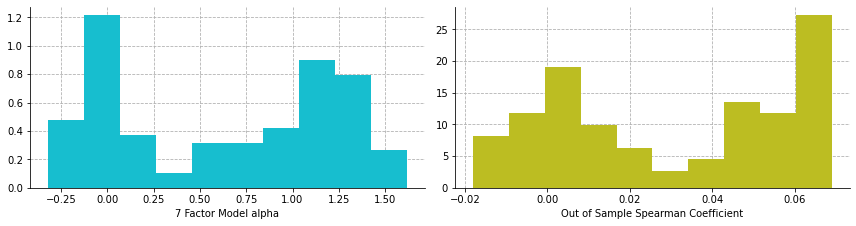

In [48]:
import matplotlib.pyplot as plt
import numpy as np
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
            (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
            (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
            (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
            (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
color_index = 18
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  
path_top = path + '_feature_importance_top20.png'
path = path + '_feature_importance.png'

# x_pos = (np.arange(max['feature'])))

fig = plt.figure(figsize=(12,6.5))
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(3,2,1)
# ax = plt.axes()
# ax.set_title('Feature Importance', fontsize=25)
# ax.set_xticks(x_pos)

ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  
# ax.set_xticklabels(results_df['FF5_Mom_STRev_alpha_VW'], rotation=90, ha='center', fontsize=12)
# ax.bar(results_df['FF5_Mom_STRev_alpha_VW'],align='center', zorder=3, color=tableau20[color_index], height=1)
ax.set_xlabel('7 Factor Model alpha')
ax.hist(results_df['FF5_Mom_STRev_alpha_VW'], density=True, color=tableau20[color_index], align='mid', zorder=3)
# plt.margins(y=0.01, x=.005)
ax.xaxis.grid(True, linestyle='--',  zorder=0)
ax.yaxis.grid(True, linestyle='--',  zorder=0)

ax = fig.add_subplot(3,2,2)

ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  
color_index = 16
ax.hist(results_df['oosSpearman'], density=True, zorder=3, color=tableau20[color_index], align='mid')
ax.set_xlabel('Out of Sample Spearman Coefficient')
# plt.margins(y=0.01, x=.005)
ax.xaxis.grid(True, linestyle='--',  zorder=0)
ax.yaxis.grid(True, linestyle='--',  zorder=0)

fig.tight_layout()
# plt.savefig(path)